In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('data/BIPA_data.csv', index_col=0)
data

,gameId,createDate,tierRank,position,teamId,summonerId,championId,result,level,championsKilled,...,totalDamageTaken,neutralMinionsKilledEnemyJungle,neutralMinionsKilledTeamJungle,visionScore,damageSelfMitigated,damageDealtToObjectives,damageDealtToTurrets,lane,gameLength,version
0,5383880006,2021-08-11 06:59:31,P318,S,200,3210877,99,WIN,10,4,...,3602,0,0,11,2830,2181,2181,NONE,972,11.16.390.1945
1,5383880006,2021-08-11 06:59:31,P466,S,100,7550211,35,LOSE,8,1,...,5077,0,2,24,2013,0,0,NONE,972,11.16.390.1945
2,5383880006,2021-08-11 06:59:31,P329,M,200,9306696,266,WIN,11,5,...,11029,0,0,15,6158,585,585,NONE,972,11.16.390.1945
3,5383880006,2021-08-11 06:59:31,P461,T,200,20281103,92,WIN,11,8,...,9944,0,0,10,7615,2318,2318,NONE,972,11.16.390.1945
4,5383880006,2021-08-11 06:59:31,P30,A,200,26082075,22,WIN,10,3,...,6387,0,0,13,3218,2370,2370,NONE,972,11.16.390.1945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,5384659633,2021-08-11 17:20:44,S146,S,100,21560397,53,WIN,15,1,...,32961,0,0,63,34725,1978,126,BOTTOM,2379,11.16.390.1945
999996,5384659633,2021-08-11 17:20:44,G442,M,100,46320531,166,WIN,18,10,...,24674,1,16,16,21371,8406,7042,MIDDLE,2379,11.16.390.1945
999997,5384659633,2021-08-11 17:20:44,G418,J,200,64820251,64,LOSE,17,5,...,45911,6,68,22,62426,20292,454,JUNGLE,2379,11.16.390.1945
999998,5384659633,2021-08-11 17:20:44,S178,A,100,72310857,81,WIN,17,6,...,28187,8,9,17,19664,11090,1062,BOTTOM,2379,11.16.390.1945


In [5]:
data = data[data['result'] != 'UNKNOWN']

In [ ]:
wardPlaced[wardPlaced > 50]

In [ ]:
#전체
wardPlaced = data['wardPlaced'].value_counts()
ward_win   = []
for i in wardPlaced[wardPlaced > 50].index:
    win = data.value_counts(['wardPlaced', 'result'])[i]['WIN']
    lose = data.value_counts(['wardPlaced', 'result'])[i]['LOSE']
    win_rate = win/(win+lose)
    ward_win.append({'wardPlaced': i, 'win_rate': win_rate})
ward_win = pd.DataFrame(ward_win)

In [ ]:
plt.figure(figsize = ( 20,10 ))

sns.barplot(data = ward_win[ward_win['wardPlaced'] < 40], x = 'wardPlaced', y = 'win_rate').set_ylim(0.3,0.6)
plt.axhline(0.5, ls= '--', lw = 3 , color = 'pink')
plt.title('All Position', weight = 'bold')
plt.show()

In [ ]:
data['position'].value_counts()

In [ ]:
data_sup =  data[data['position'] == 'S']
data_exc =  data[data['position'] != 'S']

In [ ]:
# 서폿
wardPlaced_s = data_sup['wardPlaced'].value_counts()
ward_win_s   = []
for i in wardPlaced[wardPlaced > 50].index:
    win = data_sup.value_counts(['wardPlaced', 'result'])[i]['WIN']
    lose = data_sup.value_counts(['wardPlaced', 'result'])[i]['LOSE']
    win_rate = win/(win+lose)
    ward_win.append({'wardPlaced': i, 'win_rate': win_rate})
ward_win = pd.DataFrame(ward_win)

In [ ]:
plt.figure(figsize = ( 20,10 ))

sns.barplot(data = ward_win[ward_win['wardPlaced'] < 40], x = 'wardPlaced', y = 'win_rate').set_ylim(0.3,0.6)
plt.axhline(0.5, ls= '--', lw = 3 , color = 'pink')
plt.title('Sup Position', weight = 'bold')
plt.show()

In [ ]:
# 서폿 제외
wardPlaced = data_exc['wardPlaced'].value_counts()
ward_win   = []
for i in wardPlaced[wardPlaced > 50].index:
    win = data_exc.value_counts(['wardPlaced', 'result'])[i]['WIN']
    lose = data_exc.value_counts(['wardPlaced', 'result'])[i]['LOSE']
    win_rate = win/(win+lose)
    ward_win.append({'wardPlaced': i, 'win_rate': win_rate})
ward_win = pd.DataFrame(ward_win)

In [ ]:
plt.figure(figsize = ( 20,10 ))

sns.barplot(data = ward_win[ward_win['wardPlaced'] < 50], x = 'wardPlaced', y = 'win_rate').set_ylim(0.3,0.6)
plt.axhline(0.5, ls= '--', lw = 3 , color = 'pink')
plt.title('Sup_Exc Position', weight = 'bold')
plt.show()

## 서브플롯으로 한방에 그리기

In [6]:
data_sup =  data[data['position'] == 'S']
data_exc =  data[data['position'] != 'S']

In [14]:
#전체
wardPlaced = data['wardPlaced'].value_counts()
ward_win   = []
for i in wardPlaced[wardPlaced > 50].index:
    win = data.value_counts(['wardPlaced', 'result'])[i]['WIN']
    lose = data.value_counts(['wardPlaced', 'result'])[i]['LOSE']
    win_rate = win/(win+lose)
    ward_win.append({'wardPlaced': i, 'win_rate': win_rate})
ward_win = pd.DataFrame(ward_win)

In [15]:
# 서폿
wardPlaced = data_sup['wardPlaced'].value_counts()
ward_win2   = []
for i in wardPlaced[wardPlaced > 50].index:
    win = data_sup.value_counts(['wardPlaced', 'result'])[i]['WIN']
    lose = data_sup.value_counts(['wardPlaced', 'result'])[i]['LOSE']
    win_rate = win/(win+lose)
    ward_win2.append({'wardPlaced': i, 'win_rate': win_rate})
ward_win2 = pd.DataFrame(ward_win2)

In [16]:
# 서폿 제외
wardPlaced = data_exc['wardPlaced'].value_counts()
ward_win3   = []
for i in wardPlaced[wardPlaced > 50].index:
    win = data_exc.value_counts(['wardPlaced', 'result'])[i]['WIN']
    lose = data_exc.value_counts(['wardPlaced', 'result'])[i]['LOSE']
    win_rate = win/(win+lose)
    ward_win3.append({'wardPlaced': i, 'win_rate': win_rate})
ward_win3 = pd.DataFrame(ward_win3)

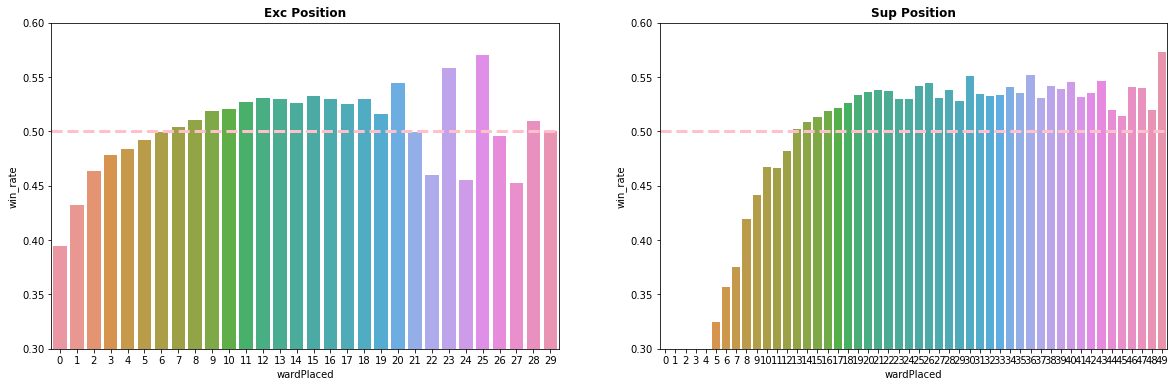

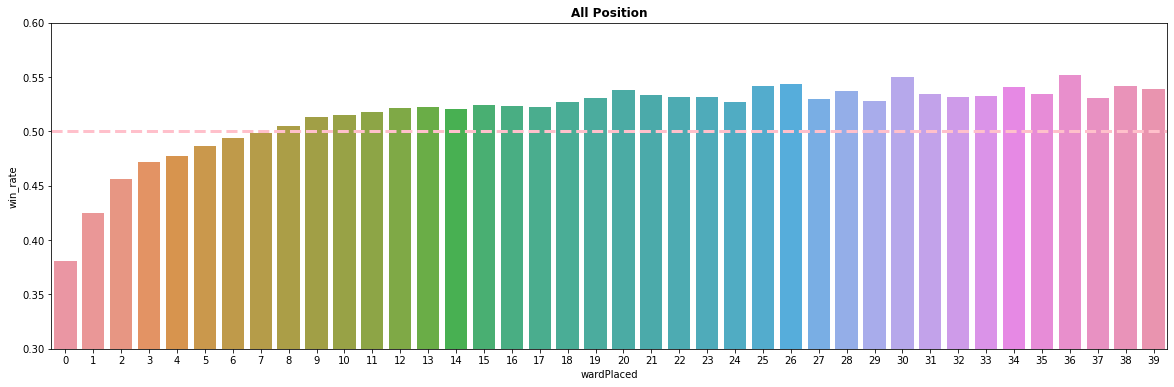

In [17]:
fig, ax1= plt.subplots(nrows=1, ncols=2, figsize=(20,6))

sns.barplot(data = ward_win3[ward_win3['wardPlaced'] < 50], x = 'wardPlaced', y = 'win_rate', ax=ax1[0]).set_ylim(0.3,0.6)
ax1[0].axhline(0.5, ls= '--', lw = 3 , color = 'pink')
ax1[0].set_title('Exc Position', weight = 'bold')

sns.barplot(data = ward_win2[ward_win2['wardPlaced'] < 50], x = 'wardPlaced', y = 'win_rate', ax=ax1[1]).set_ylim(0.3,0.6)
ax1[1].axhline(0.5, ls= '--', lw = 3 , color = 'pink')
ax1[1].set_title('Sup Position', weight = 'bold')


fig, ax2 = plt.subplots(1,1, figsize= (20,6))

sns.barplot(data = ward_win[ward_win['wardPlaced'] < 40], x = 'wardPlaced', y = 'win_rate',ci = None, ax=ax2).set_ylim(0.3,0.6)
ax2.axhline(0.5, ls= '--', lw = 3 , color = 'pink')
ax2.set_title('All Position', weight = 'bold')

plt.show()